In [1]:
import cv2
from PIL import Image, ImageEnhance

In [2]:
import import_ipynb
import NeuralNetwork3 as neural
import CharacterSeparation2 as cs

importing Jupyter notebook from NeuralNetwork3.ipynb
importing Jupyter notebook from CharacterSeparation2.ipynb


In [3]:
def separateFraction(box,origWidth,origHeight,image):
    x = box[0]
    y = box[1]
    w = box[2]
    h = box[3]
    boxH = h
        
    #denominator
    y = y + h
    h = origHeight - (origHeight - y)
    roi = image[y:y+h, x:x+w]
    cv2.imwrite("separated/denom.png", roi)
    cv2.imwrite("data/denom.png", roi)
    denom = reconstructExpression("denom.png")
   
    #numerator
    h = (origHeight-h) -boxH
    y = y - boxH - h
    roi = image[y:y+h, x:x+w]
    cv2.imwrite("separated/num.png", roi)
    cv2.imwrite("data/num.png", roi)
    num = reconstructExpression("num.png")

    #rest
    x = x + w
    w = origWidth-x
    h = origHeight
    roi = image[y:y+h, x:x+w]
    cv2.imwrite("separated/rest.png", roi)
    cv2.imwrite("data/rest.png", roi)
    rest = reconstructExpression("rest.png")
    
    returnString = "frac("+num+","+denom+")"+rest

    return returnString

In [4]:
def checkFractionBar(aR):
    if(aR>=5.00):
        return True

In [5]:
def checkSquareRoot(box,prevBox):
    if(prevBox[0]<=(box[0]+box[2])<=(prevBox[0]+prevBox[2])):
        if(prevBox[1]<=(box[1]+box[3])<=(prevBox[1]+prevBox[3])):
            return True

In [6]:
def checkExponent(centroid,prevCentroid):
    if(centroid[0]>prevCentroid[0]):
        if(centroid[1]<prevCentroid[1]-60):
            return True

In [7]:
def reconstructExpression(fileName):
    boundingBox = []
    centroid = []
    finalString = ""
    carryRoot = False
    carryExp = False
    charFound = False
    
    i = cs.separateChars(fileName)
    
    boundingBox = cs.getBoundingBoxes()
    centroid = cs.getCentroids()
    
    #read in brightened image
    image = cv2.imread("data/bright.png")
    origWidth, origHeight, channels = image.shape
    
    #bubble sort
    for passNum in range(0,i):
        for c in range(0, i-passNum-1):
            if(boundingBox[c][0]>boundingBox[c+1][0]):
                temp = boundingBox[c]
                boundingBox[c] = boundingBox[c+1]
                boundingBox[c+1] = temp
                temp2 = centroid[c]
                centroid[c] = centroid[c+1]
                centroid[c+1] = temp2
    
    for n in range(0,i): 
        charFound = False
        aspectRatio = (boundingBox[n][2]/boundingBox[n][3])
        
        #square roots
        if(n>0):
            if(checkSquareRoot(boundingBox[n],boundingBox[n-1])==True):
                finalString = finalString + "sqrt("
                charFound = True
                carryRoot=True
                carryRootBox=n-1
                
            #exponents
            elif(checkExponent(centroid[n],centroid[n-1])==True):
                finalString = finalString + "exp("
                charFound = True
                carryExp=True
                carryExpBox=n-1
        
        #fractions
        if(checkFractionBar(aspectRatio)==True):
            finalString = finalString + separateFraction(boundingBox[n],origWidth,origHeight,image)
            charFound = True
            break
        
        #carry check for roots
        if(carryRoot==True and carryExp==False):
            if(checkSquareRoot(boundingBox[n],boundingBox[carryRootBox])==True):
                finalString = finalString + "C"
                if(n==i-1):
                    finalString = finalString + ")"
                    carryRoot=False
            else:
                finalString = finalString + ")"
                carryRoot=False
                
        #carry check for exponents
        if(carryExp==True):
            if(checkExponent(centroid[n],centroid[carryExpBox])==True):
                finalString = finalString + "C"
                if(n==i-1):
                    finalString = finalString + ")"
                    carryExp=False
            else:
                finalString = finalString + ")"
                carryExp=False
        
        if(charFound == False):
            fileName = "roi"+ str(n) +".png"
            finalString = finalString + str(neural.identifyChar(fileName))
            
        print(finalString)
    return finalString 


In [8]:
def main():
    expression = reconstructExpression("fraction.jpg")
    print(expression)
    cv2.waitKey(0)
    

Loading image...
Min: 0.01
Max: 0.6958048
[[0.12091131]
 [0.00160723]
 [0.00487512]
 [0.00930884]
 [0.22591814]
 [0.35184587]
 [0.00194726]
 [0.19519378]
 [0.00387701]
 [0.00074385]]
Predicted value: 5
5
5
Loading image...
Min: 0.01
Max: 0.648839
[[0.00215533]
 [0.02262412]
 [0.00448058]
 [0.00529627]
 [0.37486481]
 [0.09765849]
 [0.02063042]
 [0.09595444]
 [0.00638934]
 [0.00944933]]
Predicted value: 4
4
Loading image...
Min: 0.01
Max: 0.6747551
[[0.00607701]
 [0.05613347]
 [0.0014147 ]
 [0.10805317]
 [0.1676105 ]
 [0.00271775]
 [0.05447776]
 [0.00949827]
 [0.00395081]
 [0.03233589]]
Predicted value: 4
44
Loading image...
Min: 0.01
Max: 0.6451114
[[0.00916306]
 [0.00774123]
 [0.00213594]
 [0.01971939]
 [0.3198693 ]
 [0.00922296]
 [0.00409925]
 [0.47166297]
 [0.00353621]
 [0.02218333]]
Predicted value: 7
447
447
frac(447,5)


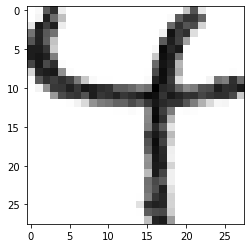

In [9]:
if __name__ == "__main__":
    main()